# Instagram Video Upload Exploritory Data Analysis
Research Question(s):

What time window(s) is best to upload a video for maximum engagement to Instagram?
How do hashtags factor into engagement on Instagram?
How long will content take to reach the maximum engagement on Instagram?
What day is best to upload to Instagram?
The Instagram exploratory data analysis compares 2 datasets one big data set and one small. The big set comprises of 11 years, from 2010 to 2021 Instagram data, consisting of over 178k rows. The relevant set is approximately 2,100 rows of data from trending tech influencers. The bigger data set and will be used as a baseline against the 2023 findings.

The bigger dataset has ‘Likes’, ‘Comment count’, ‘Days past from post’, ‘Numer of Tags ‘day’, and ‘Hour’. These variables will be utilized to answer all four questions. The smaller dataset is limited to two variables for comparion: The ‘timestamp’, and ‘avg_engagment’; However, the smaller dataset was mined / compiled in 2023 and is relevant while limited to answering only question 1.

The datasets can be accessed: https://www.kaggle.com/datasets/joebeachcapital/instagram-coders

# Now exploring the relevant dataset

In [36]:
#-- Importing Nessesary Liberaries --#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#-- Importing the First Dataset --#
df1 = pd.read_csv('/Users/michaelsegaline/Desktop/Instagram Profiles - Github Hashtag - instagram_profile.csv')

In [3]:
#-- Savaing a copy of the code to be manipulated --#
df_raw1 = df1.copy()

In [4]:
#-- Inpescting the column names in the dataset --#
df_raw1.head()

,account,biography,business_address_json,business_category_name,business_email,external_url,fbid,followers,following,highlights,...,avg_engagement,post_hashtags,maybe_country_codes,bio_hashtags,avatar_cached,category_enum,category_name,changelog,full_name,is_private
0,yazilim.exe,◾️𝗖𝝝𝗗𝗜𝗡𝗚 ◾️𝗪𝗘𝗕 𝗗𝗘𝗩𝗘𝗟𝝝𝗣𝗘𝗥\n◾️𝗣𝗥𝝝𝗚𝗥𝝠𝗠𝗠𝗘𝗥 ◾️𝗦𝝝𝗖𝗜...,"{""city_name"":null,""city_id"":null,""latitude"":nu...",Creators & Celebrities,NaN,https://www.youtube.com/watch?v=Otnurz26st0&t=...,1.784143e+16,880,354,"[{""id"":""17880714053008666"",""title"":""Sound&#x1F...",...,0.0482,"[""code"",""yazilim"",""programmation"",""motivation""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
1,yazilimci.genclik,👩‍💻 Yazılımcı Gençlerin Buluşma Noktası 👨‍💻...,"{""city_name"":null,""city_id"":null,""latitude"":nu...",Non-Profits & Religious Organizations,info@yazilimcigenclik.com.tr,https://yazilimcigenclik.com.tr/telegram/,1.784141e+16,24036,103,"[{""id"":""18121606399097057"",""title"":""Sosyal Med...",...,0.0081,"[""yazilimcigenclik"",""programlama"",""programlama...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
2,yazilim.academy,🏢 Istanbul Technical University\n📍 Sıfırdan C ...,"{""city_name"":null,""city_id"":null,""latitude"":nu...",Personal Goods & General Merchandise Stores,NaN,NaN,1.784144e+16,2827,6695,"[{""id"":""17974324465320629"",""title"":""Yaz&#x131;...",...,0.0426,"[""software"",""cprogramming"",""cprogramlama"",""yaz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
3,yahya.kassid,#kdB.\nHi. and welcome I'm a #WebDesigner & #O...,NaN,NaN,NaN,http://yahyakassid.com/,1.784140e+16,1345,169,[],...,0.0192,"[""websitedesigner"",""designweb"",""web_design"",""w...","[""RU""]","[""kdb"",""webdesigner"",""onlinestorebuilder""]",avatar_yahya.kassid.jpg,NaN,Предприемач,"[{""followers"":1377,""following"":172,""avg_engage...",Yahya kassid | web designer,no
4,xnetking,🔥 | Developer's Planet ⚡\n📛 | Learn Coding ess...,NaN,NaN,NaN,https://www.xnetking.in/,1.784144e+16,208,73,"[{""id"":""17917345264765375"",""title"":""Resources""...",...,0.0985,"[""coding"",""developer"",""software"",""webdeveloper...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [5]:
#-- Inspecting the Shape: 2180 rows and 32 columns --#
df_raw1.shape

(2180, 32)

In [6]:
#-- The Dataset is less than 1% sparse before dropping all empty rows --#
#-- Droping empty rows with dropna() function, then reinspecting the shape to access the sparsity --#
df_raw1.dropna()
df_raw1.shape

(2180, 32)

In [7]:
#-- Exploring the names of every column --#
df_raw1.columns

Index(['account', 'biography', 'business_address_json',
       'business_category_name', 'business_email', 'external_url', 'fbid',
       'followers', 'following', 'highlights', 'id', 'is_business_account',
       'is_professional_account', 'is_verified', 'posts', 'posts_count',
       'profile_image_link', 'profile_name', 'timestamp', 'highlights_count',
       'country_code', 'region', 'avg_engagement', 'post_hashtags',
       'maybe_country_codes', 'bio_hashtags', 'avatar_cached', 'category_enum',
       'category_name', 'changelog', 'full_name', 'is_private'],
      dtype='object')

In [8]:
#-- Getting descriptive statistics of the continous variables --#
df_raw1.describe()


,fbid,followers,following,id,posts_count,highlights_count,avg_engagement
count,2.180000e+03,2180.000000,2180.000000,2.180000e+03,2180.000000,2180.000000,2119.000000
mean,1.784142e+16,3742.219725,833.504128,1.578932e+10,174.810092,4.218807,0.107939
std,1.609492e+10,20916.841627,1262.555265,1.610490e+10,460.206757,9.096056,0.230528
min,1.784140e+16,101.000000,0.000000,3.188200e+05,0.000000,0.000000,0.000200
25%,1.784140e+16,239.000000,163.000000,2.277471e+09,25.000000,0.000000,0.031450
50%,1.784141e+16,519.000000,402.500000,7.776540e+09,63.000000,2.000000,0.070000
75%,1.784143e+16,1207.000000,889.500000,3.219110e+10,160.000000,6.000000,0.134850
max,1.784145e+16,548827.000000,7502.000000,4.885600e+10,11031.000000,266.000000,8.826900


In [9]:
#-- Creating a column named "upload_hour" to isolate the content upload hour and create new column in the dataset --#
#-- Using the str[] function to isolate the upload hour (24) by isolating positions 11 through 13 in the array --#
df_raw1['upload_hour'] = df_raw1['timestamp'].str[11:13]

# Display the DataFrame
df_raw1.upload_hour

0       22
1       22
2       22
3       17
4       22
        ..
2175    03
2176    15
2177    03
2178    16
2179    08
Name: upload_hour, Length: 2180, dtype: object

In [10]:
#-- Convert the 'upload_hour' column to numeric (because it's stored as strings) --#

df_raw1['upload_hour'] = pd.to_numeric(df_raw1['upload_hour'], errors='coerce')

#-- Drop rows where 'upload_hour' is greater than 24 --#
df_raw1 = df_raw1[df_raw1['upload_hour'] <= 24]

#-- Only 7 rows dropped after filtering. --#
df_raw1.shape

(2173, 33)

In [11]:
 #-- Now renaming the cleaned dataset --#
df1_cleaned = df_raw1

# Univariate Exploration

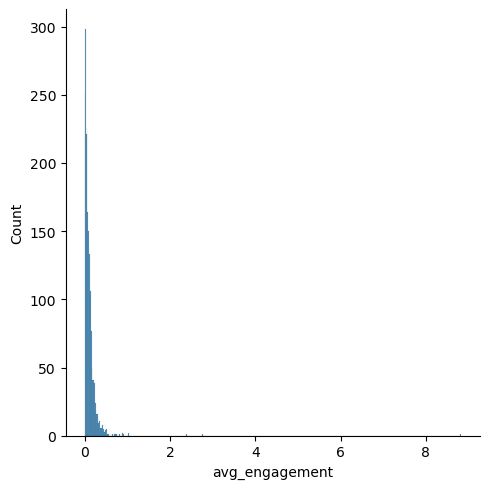

In [12]:
#-- Exploring the density distrobution of'average engagment'  --#
eng = df1_cleaned.avg_engagement
sns.displot(eng)

<AxesSubplot:xlabel='upload_hour', ylabel='Count'>

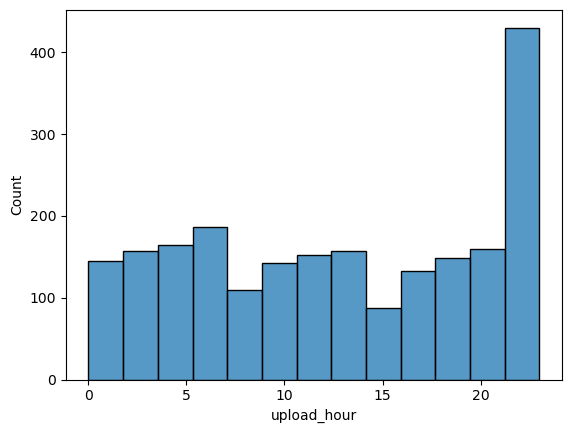

In [22]:
#-- Plotting the frequency of'upload_hour' --#
hour = df1_cleaned.upload_hour
sns.histplot(hour)

# Bivariate Exploration
When exploring 'avg_engagement' against "Upload_Hour" the output shows two distinct modes of time windows. One problem with the variable, is the unkown composition of the variable.

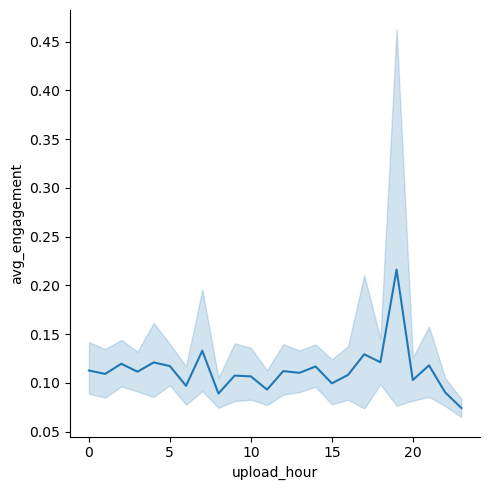

In [23]:
sns.relplot(data=df1_cleaned, y="avg_engagement", x="upload_hour", kind="line")

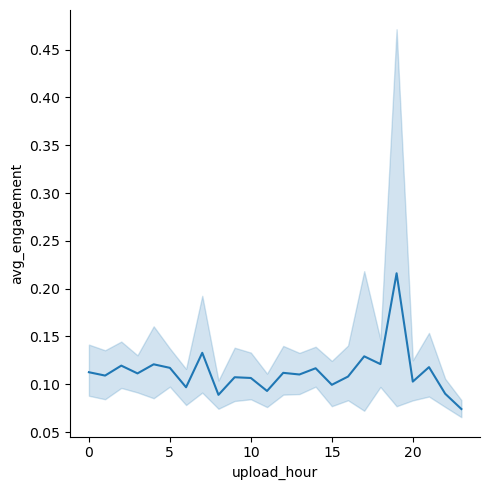

In [24]:
sns.relplot(data=df1_cleaned, y="avg_engagement", x="upload_hour", kind="line")

#                                     Big Dataset Comparison

The Dataset can be found here:
https://www.kaggle.com/datasets/vasileiosmpletsos/1100-instagram-users-datetime-posts-data

The dataset is 178,922 rows after all covering the top treding instagram accounts from the years of 2010-2020

2nd dataset incudes more engagement metrics for a more descriptive analysis. 
The variables to be explored are "Likes","Days passed from post","Numer of Tags", "Numer of Comments", "Year", and "Hour". 

In [31]:
#-- Importing the  2nd Dataset --#
df2 = pd.read_csv('/Users/michaelsegaline/Desktop/Instagram_Data.csv')

In [32]:
#-- Making a copy of the dataset --#
df_raw2 = df2.copy()
#-- Inspecting the dataset --#
df_raw2.head()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51


In [33]:
#-- Bigger Dataset with 178,922 rows and more enagement meterics. The timestamps has been nicely parsed to insepct 
#-- every minute of upload time --#
df_raw2.shape

(178922, 13)

In [29]:
#-- Dropping missing values --#
df_raw2.dropna()
df_raw2.shape

(178922, 13)

In [24]:
#-- Inspecting descriptive statistics --#
df2.describe()

,User uuid,Likes,Days passed from post,Likes Score,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
count,178922.000000,1.789220e+05,178922.000000,178922.000000,178922.000000,1.789220e+05,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000
mean,546.316948,4.298806e+04,447.477510,0.270961,3.578045,5.622285e+02,2019.412107,6.764814,15.694219,13.396435,28.741737
std,317.200142,2.604648e+05,492.620418,0.210007,6.877008,1.201380e+04,1.374731,3.753390,8.824645,7.385343,17.678904
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2010.000000,1.000000,1.000000,0.000000,0.000000
25%,273.000000,1.340000e+02,107.000000,0.100000,0.000000,4.000000e+00,2019.000000,3.000000,8.000000,7.000000,13.000000
50%,540.000000,1.064000e+03,260.000000,0.220000,0.000000,2.300000e+01,2020.000000,7.000000,16.000000,16.000000,29.000000
75%,829.000000,1.074300e+04,612.000000,0.390000,3.000000,1.357500e+02,2020.000000,10.000000,23.000000,20.000000,44.000000
max,1089.000000,1.544569e+07,3775.000000,1.000000,31.000000,2.907644e+06,2021.000000,12.000000,31.000000,23.000000,59.000000


# Univariate Exploration

<AxesSubplot:xlabel='Likes', ylabel='Density'>

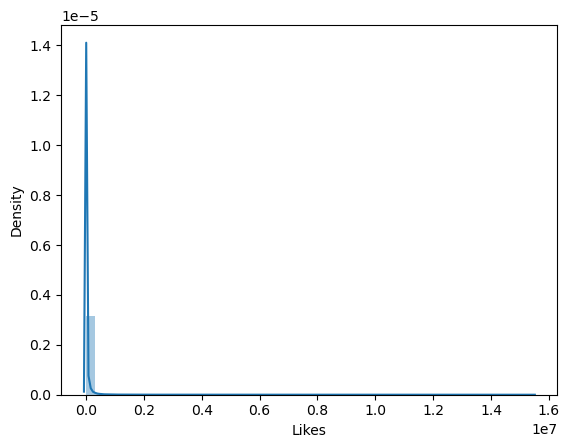

In [37]:
sns.distplot(df2.Likes)

<AxesSubplot:xlabel='Days passed from post', ylabel='Density'>

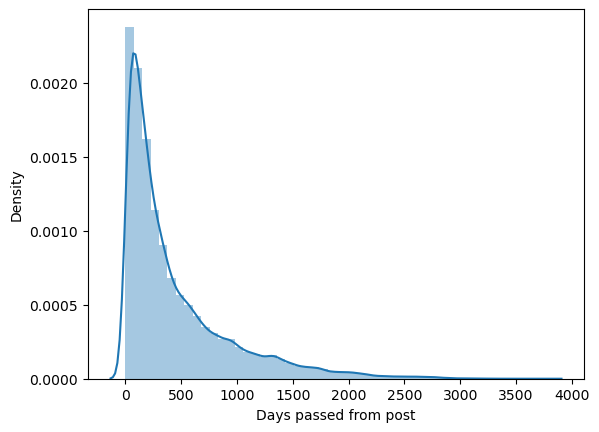

In [38]:
#-- Plotting the distrobution of 'Days passed from post'
sns.distplot(df2['Days passed from post'] )

<AxesSubplot:xlabel='Numer of Tags', ylabel='Density'>

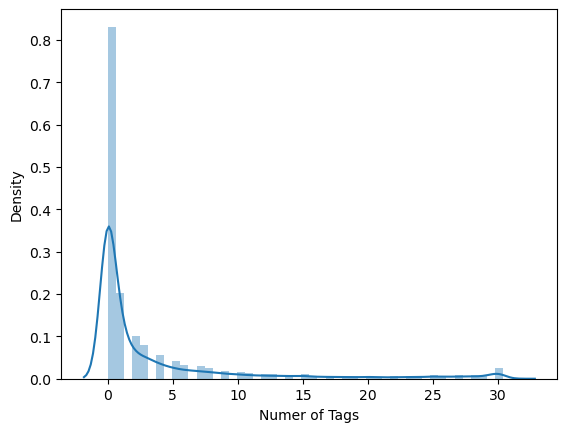

In [39]:
#-- Plotting the distrobution of 'Numer of Tags' --#

sns.distplot(df2['Numer of Tags'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

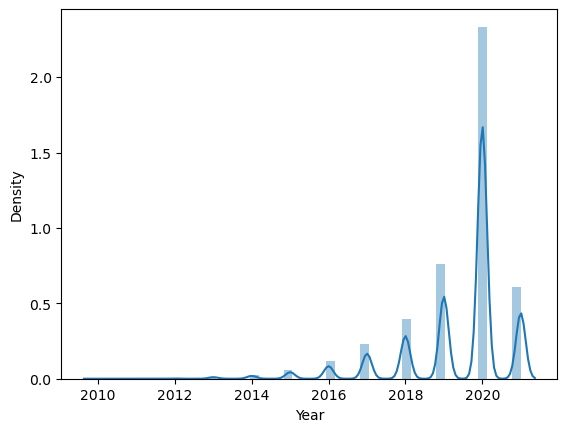

In [40]:
#-- Plotting the distrobution of the 'year' content was uploaded. --#

sns.distplot(df2['Year'])

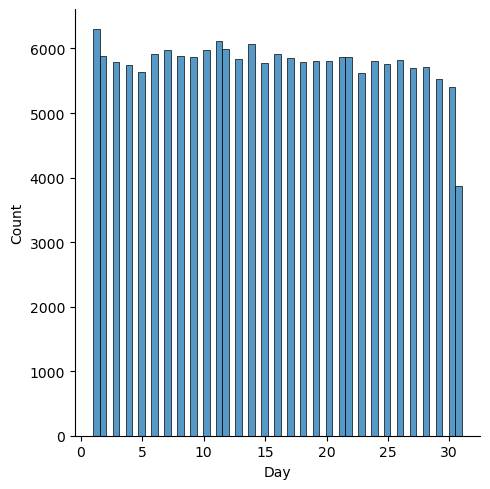

In [41]:
#-- Plotting the frequency distrobution of the "Day" people upload content --#
sns.displot(df2['Day'])

# Bivariate Exploration

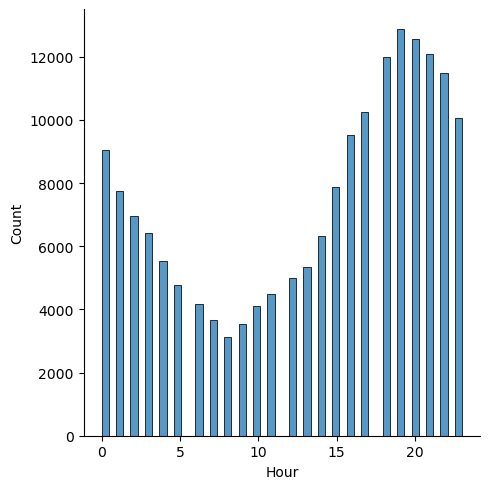

In [42]:
#-- Now Plotting the frequency distrobution for upload hour --#
sns.displot(df2['Hour'])

From the above graph: it appears that frequency of uploads occur between 1500 - 2200Z (Zulu time). Take note of lack of uploads between 0500 - 1000Z (2100 - 0000 Pacific Standard Time)

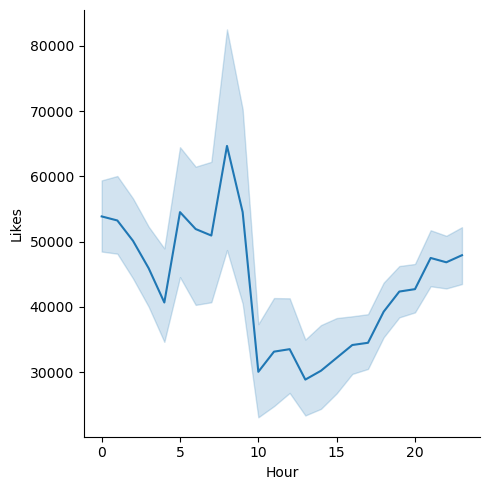

In [43]:
#-- Now plotting 'Likes' against upload hour --#
sns.relplot(data=df2, y="Likes", x="Hour", kind="line")

After plotting the frequency of 'likes' against upload 'Hour', there seems to be a massive spike between the hours of 0500 - 0800Z (9pm - 12pm Pacfic Standard Time)

# Engineering a feature: Engagement Per Like (EPL)¶
Engineering features is simply "making varaibles". With these variables, more relevant patterns, can be discovered. The Egagement Per Like, filters 'likes' via 'comment_count'.

EPL = How many comments where generated per 'Like' of a piece of content.

In [44]:
#-- Making variable: 'Engagement Per Like' or 'EPL' --#

EPL = df2['Likes'] / df2['Numer of Comments']

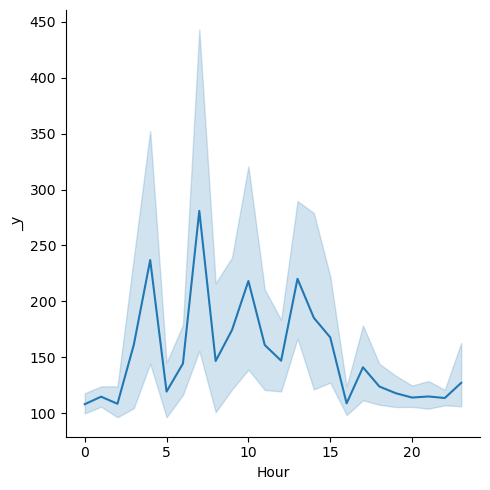

In [45]:
#-- Plotting EPL against upload 'Hour' --#
sns.relplot(data=df2, y=EPL, x="Hour", kind="line")

When exploring Engagement Per Like, the upload time peak with the highest engagement is between the 0500-0800Z. 
Notice there is a minimal enegagement spike between the 1500 - 2200 hour mark. When comparing the hard-blue-line in the above graph, there 275 / 130 = 2.11 times-higher-engagment in the 0500-0800Z hour vs. 1500-2200Z. 

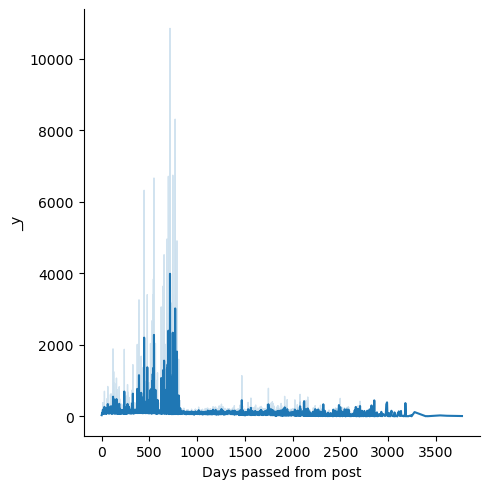

In [46]:
#-- Now exploring the EPL against "Days passed from post" --#

sns.relplot(data=df2, y=EPL, x="Days passed from post", kind="line")

The above graph shows in that content engagement peaks and drops dramatically after the 600-800 day mark. The distrobution seems to imply that engaging content, will be 'more engaged with' approximently with in 300 - 500 days after upload.

The 300-500-day window seems to double in engagment then double again at the 700-day mark

Additionally, the highest amount of enegagement will occur at approximently the 700-day mark.

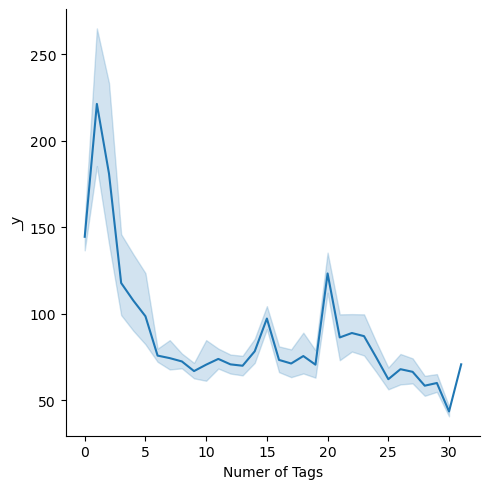

In [47]:
#-- Now exploring the EPL against the number of hashtags used --#

sns.relplot(data=df2, y=EPL, x="Numer of Tags", kind="line")

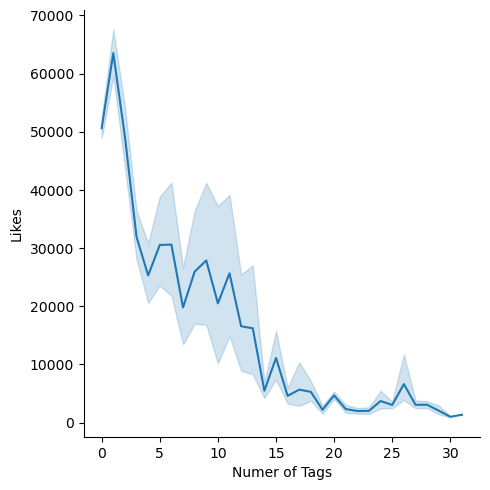

In [48]:
#-- Now exploring the count of 'likes' against Number of Hashtags used --#

sns.relplot(data=df2, y='Likes', x="Numer of Tags", kind="line")

The above graph indicates that the frequency of 'likes' is higher when the number of hashtags is near '0'.

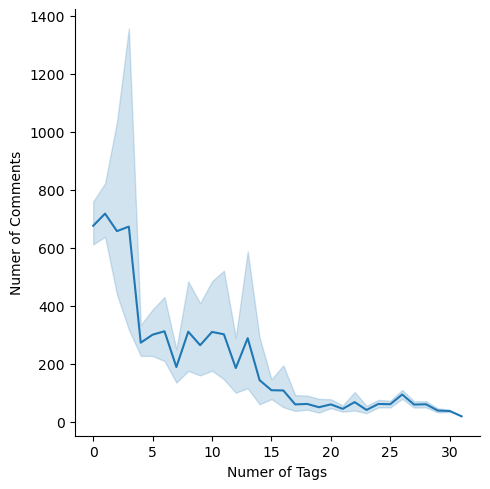

In [49]:
#-- Now exploring the 'comment count' compared to the number of hashtags used --#

sns.relplot(data=df2, y='Numer of Comments', x="Numer of Tags", kind="line")

It appears that content with '0' hashtags gets more engagement then content with more than 2 hashtags.

The graph suggests that maybe '1' hashtag might increase engagement.

# What day is best to upload on Instagram?

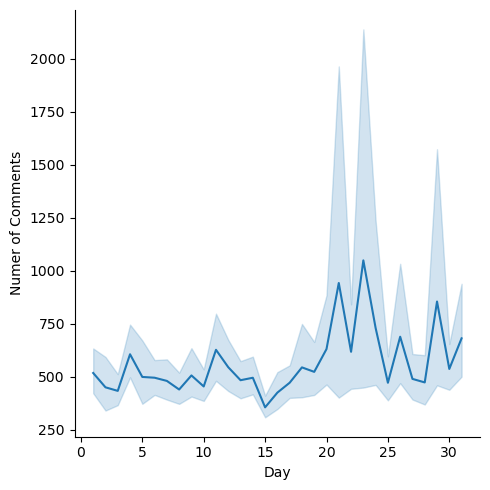

In [50]:
#-- Plotting the frequency of comment count per 'Day' of the month --#

sns.relplot(data=df2, y='Numer of Comments', x="Day", kind="line")

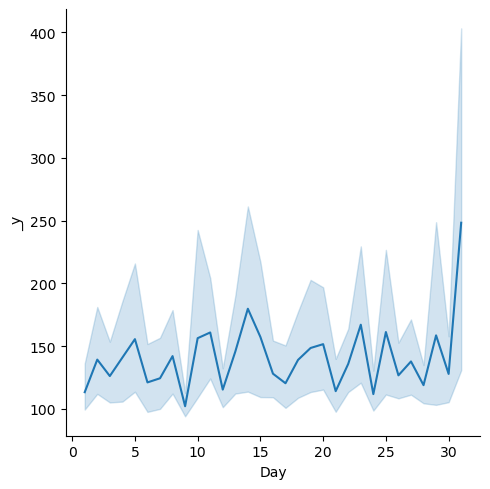

In [51]:


sns.relplot(data=df2, y=EPL, x="Day", kind="line")

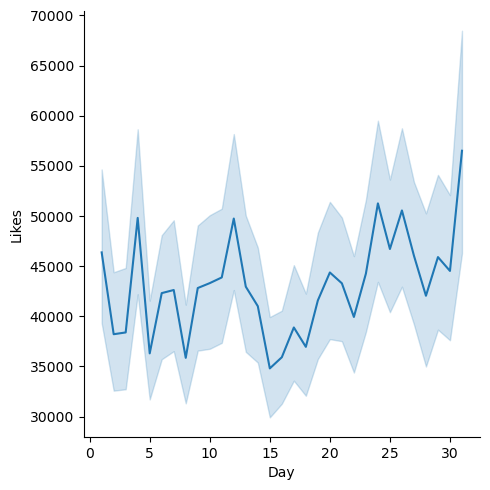

In [52]:
sns.relplot(data=df2, y='Likes', x="Day", kind="line")

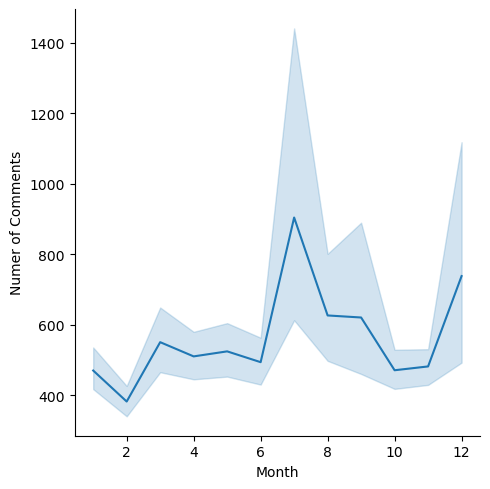

In [53]:
#-- Now exploring the 'comment count' compared to the upload 'month' --#

sns.relplot(data=df2, y='Numer of Comments', x="Month", kind="line")

It appears that the months when the audience gives most 'comments' is in the summer, with July as the highest frequency. Note sharp uptick again in December.

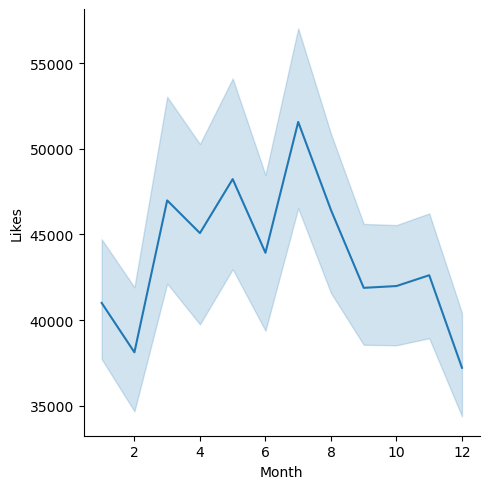

In [54]:
#-- Now exploring the frequency of 'Likes' per 'Month' --#

sns.relplot(data=df2, y='Likes', x="Month", kind="line")

There apprears the audience gives out 'spikes-of-likes' on odd months: 1,3,5,7, and 11; The highest month being July.